# Term Project

## Module: Speech and Audio, COMP47700

## Student Names: Ovuezienye Carissa Okoro, Toluwabori Akinola

## Topic: Synthesizing Raw Audio Signals to Sound like Saxophone Sounds

## Module Coordinator: Dr Andrew Hines

**Introduction**

In the field of digital sound processing, the ability to manipulate and transform simple sound signals into rich, complex tones resembling those produced by musical instruments has opened new avenues for creativity and innovation. Among a lot of instruments, the saxophone stands out for its distinctive sound that has captivated listeners for decades across various genres, from jazz to classical music. Our project examines authentic acoustics of the saxophone, specifically the overtones created when a note is played. From this analysis, we employ signal processing techniques to convert basic generated sound signals into ones that bear the distinct characteristics of saxophone music. <br>

Inspiration for this project is gotten from the work carried out by Katie He. [GitHub Link](https://github.com/katieshiqihe/music_in_python/tree/main)

<br>

**Methodolgy**

- Frequency Generation: We start by generating different frequencies that match different musical notes. Using the formula f = 440 * (122)n where 440 is the reference frequency of the note A4 and n is the number of semitones away from A4
- Sine Wave Generation: From the frequencies of each notes, we’ll then generate a signal for each freq using the formula Signal = sin(2ft) where f is the frequency in hertz and t is the time in seconds. This formula will create the base signals for subsequent modifications.
- Saxophone sounds analysis: We then acquire an actual saxophone sound and examine the characteristics. Some signal visualisation would come into play here.
- Characterising saxophone sounds: The saxophone sound is then characterised and using Fourier Transformation, we extract certain paramters in terms of a numpy array that makes up a saxophone sound.
- Characteristic application: The parameters are then applied to the raw sound signal
- Apply ADSR: An Attack, Delay, Sustain and Release envelope is added to the resulting sound signal to make it sound more natural.


In [ ]:
import numpy as np
from scipy.io import wavfile
import librosa, librosa.display
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
plt.style.use('seaborn-dark')
%run Util.ipynb
%matplotlib inline
import IPython.display as ipd

/var/folders/wz/njd4pyh975g7stkhmhcy2frr0000gn/T/ipykernel_78262/352002470.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


## Frequency and Sine wave generation
Here we show the generation of a pure sine wave representing middle C (C4). <br>
Initially, the frequency of middle C is retrieved from a dictionary containing the frequencies of all keys on a standard saxophone, returned by a function named get_music_notes(). With the frequency obtained, a pure sine wave of 2 seconds duration and an amplitude of 2048 is generated using the get_sine_wave() function. Finally, the generated sine wave is saved as an audio file named 'pure_c.wav'.<br>
By setting the sample rate to 44100 samples per second and converting the waveform data to a 16 bit integer format, the code ensures compatibility with standard audio formats.

In [ ]:
# Get middle C frequency
note_freqs = get_music_notes()
frequency = note_freqs['C4']

# Pure sine wave
sine_wave = get_sine_wave(frequency, duration=2, amplitude=2048)
wavfile.write('data/pure_c.wav', rate=44100, data=sine_wave.astype(np.int16))

### Visualising pure c4


We read in 'pure_c.wav' which assigns the sample rate and the audio data of the file to the variables 'sample_rate' and 'middle_c'. <br>Next we use matplotlib to plot a segment of the audio data, specifically from the 500th to the 2500th sample, against time. <br>
Lastly, the 'ipd.Audio' function from IPython.display module is employed to generate an audio player widget, allowing for the playback of the 'middle_c' audio with a sample rate of 44100 Hz and normalized amplitude.

In [ ]:
sample_rate, middle_c = wavfile.read('data/pure_c.wav')

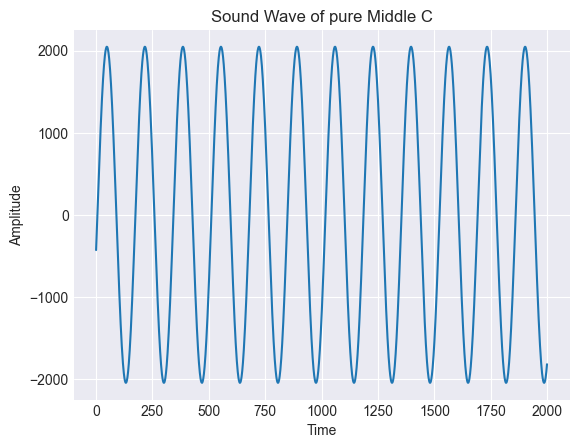

In [ ]:
plt.plot(middle_c[500:2500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of pure Middle C')
plt.grid()

In [ ]:
ipd.Audio(middle_c, rate=44100, normalize=True)

## Saxophone sound visualisation and Analysis

We read in an actual saxophone sound recording that was recorded from the website: [https://virtualpiano.net/?instr=saxophone](https://virtualpiano.net/?instr=saxophone).<br>
Plotting the amplitude of the 500th to the 2500th sample against time, shows us the overtones that make up the saxophone sound.<br>
As before, we then use the 'ipd.Audio' function from IPython to generate an audio player widget for the saxophone sound.

In [ ]:
sax_sample_rate, sax_middle_c = wavfile.read('data/sax_c2.wav')

/var/folders/wz/njd4pyh975g7stkhmhcy2frr0000gn/T/ipykernel_78262/3539627982.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sax_sample_rate, sax_middle_c = wavfile.read('data/sax_c2.wav')


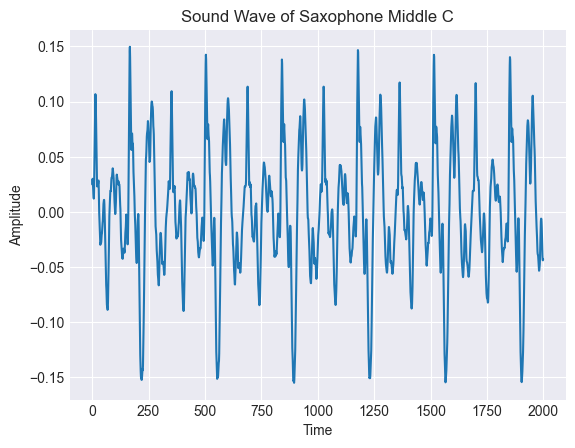

In [ ]:
plt.plot(sax_middle_c[500:2500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of Saxophone Middle C')
plt.grid()

In [ ]:
ipd.Audio(sax_middle_c, rate=sax_sample_rate, normalize=True)

### Fourier Transformation

The Fast Fourier Transform (FFT) is an important algorithm in digital signal processing for efficiently computing the Discrete Fourier Transform (DFT) of a sequence, enabling the analysis of signals in the frequency domain. The FFT dramatically reduces the computational complexity of computing the DFT from O(n^2) to O(n log n), making it practical for real time applications and large datasets. The algorithm decomposes a sequence of N complex numbers into its constituent frequencies, revealing the amplitude and phase information associated with each frequency component.
According to “Brigham, E. O. (1988). The Fast Fourier Transform and Its Applications. Prentice Hall.”, the FFT algorithm works by recursively dividing the input sequence into smaller sub sequences and combining their Fourier transforms to compute the overall DFT. This divide and conquer approach exploits the periodicity and symmetry properties of the Fourier transform to reduce the number of computations required. The result is a significant speedup compared to traditional methods, particularly for sequences with a power of two length, where the algorithm exhibits its optimal performance.
The FFT has widespread applications across various fields, including audio processing, telecommunications, image processing, and scientific computing. In audio processing, for example, the FFT is used for tasks such as spectral analysis, pitch detection, and audio effects like filtering and equalisation.
<br><br>
Here we perform a Fourier transform on the audio data of the saxophone Middle C recording. <br>
Firstly, it creates a time array 't' using NumPy's 'arange' function, covering the range of samples in the 'sax_middle_c' audio. Then, it computes the frequencies corresponding to each point in the Fourier transform using NumPy's 'fftfreq' function, scaled by the saxophone sample rate 'sax_sample_rate'. <br>
The Fourier transform of the audio data is computed using NumPy's 'fft' function and stored in 'sp'. The code proceeds to plot the spectrum, representing the amplitude of each frequency component, against frequency. The plot is limited to frequencies between 0 and 2000 Hz. <br>Finally, the plot is saved as an image file named 'spectrum.jpg'.

In [ ]:
t = np.arange(sax_middle_c.shape[0])
freq = np.fft.fftfreq(t.shape[-1]) * sax_sample_rate
sp = np.fft.fft(sax_middle_c)

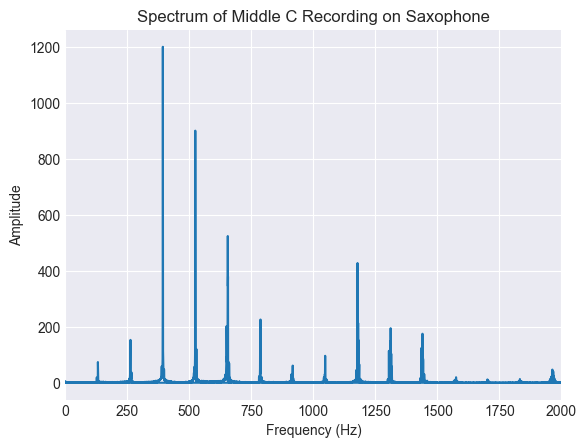

In [ ]:
# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Middle C Recording on Saxophone')
plt.xlim((0, 2000))
plt.grid()
plt.savefig('data/spectrum.jpg')

From the graph, we can see a pattern as multiples of a frequency has varying amplitudes. To take advantage of this behaviour, we can apply the Fourier Transformation to the raw sound signal.

## Applying Fourier Transformation

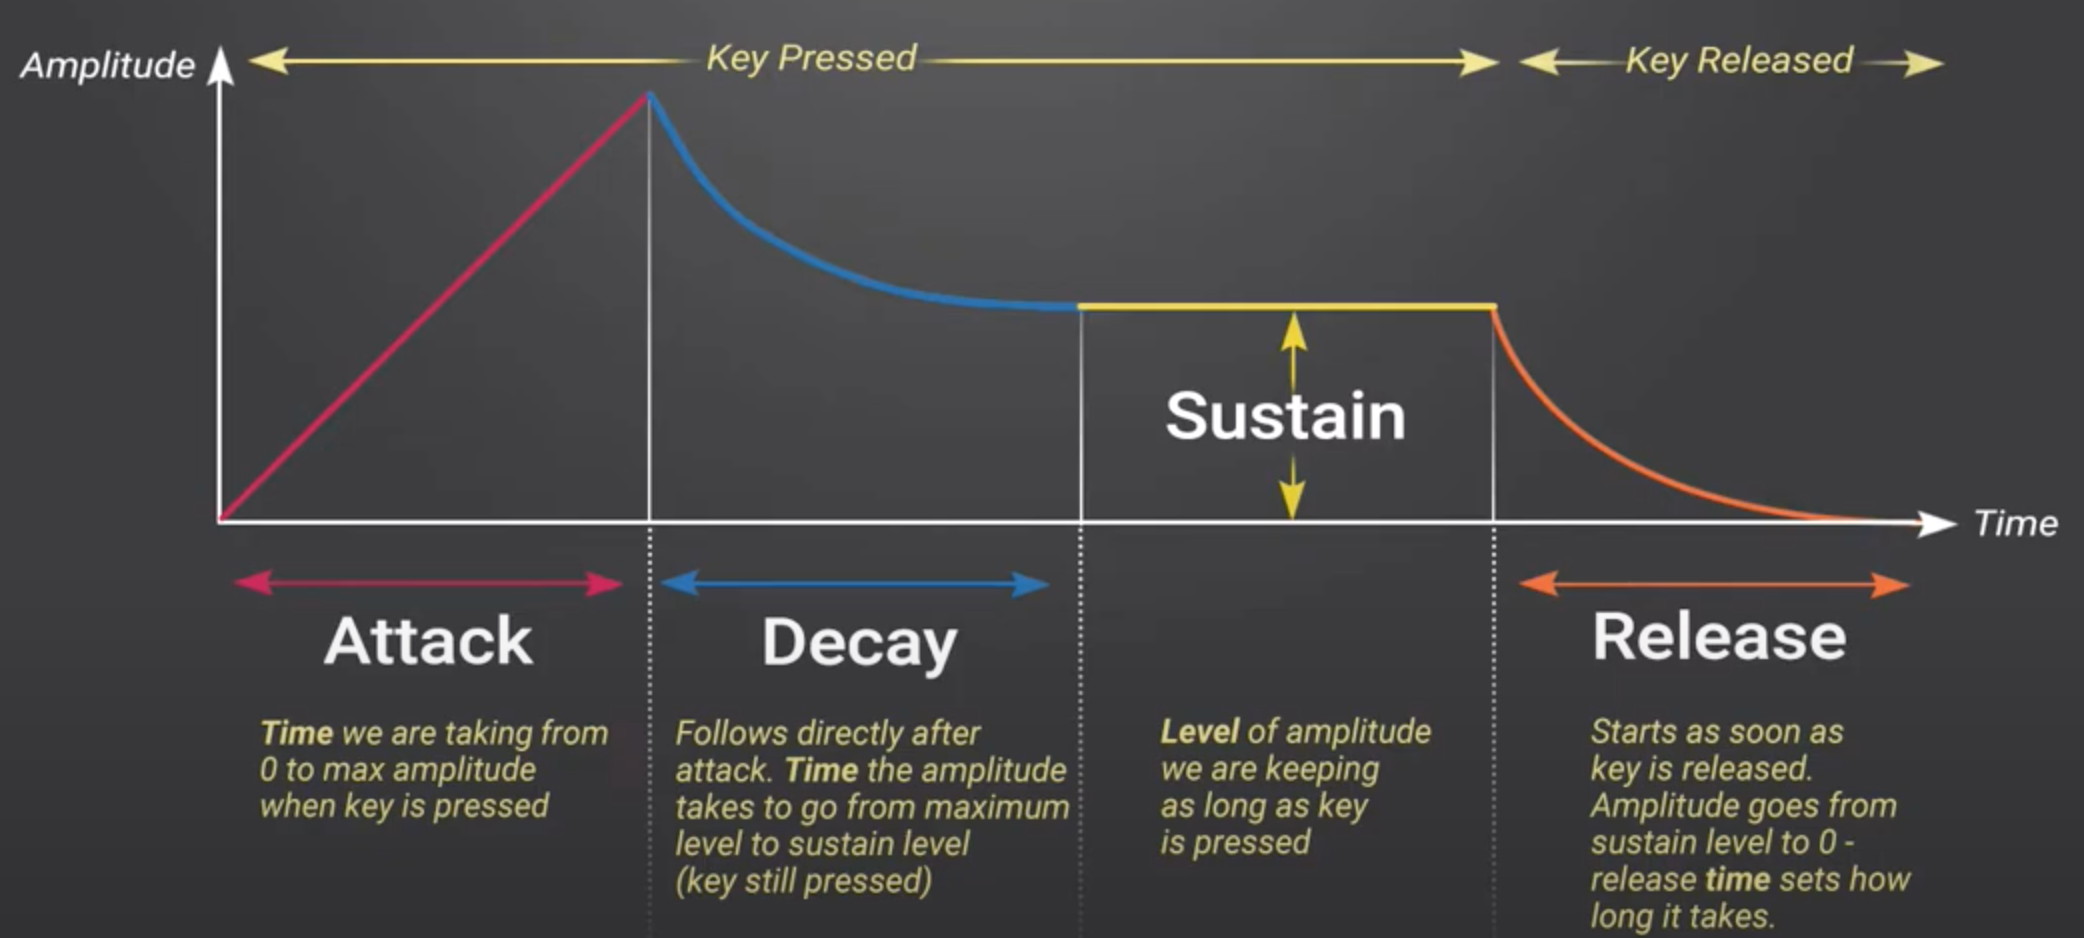Initially, this code generates a time array 't' covering the length of the saxophone Middle C audio. Then, it computes the Discrete Fourier Transformation (DFT) sample frequencies using the 'fftfreq' function from NumPy's FFT module, scaled by the saxophone sample rate. The Fourier transform of the saxophone Middle C audio is computed using 'fft'.

Next, the code filters out negative frequencies and identifies the dominant frequencies by sorting the absolute values of the Fourier coefficients. It then calculates frequency ratios and amplitude ratios for the saxophone note based on the dominant frequencies.

Using these ratios, it constructs a 'sax_factor' array representing the relative contribution of each overtone in the saxophone note. This 'sax_factor' is normalised and applied to generate a saxophone note with overtones using a custom function 'apply_saxophone_overtones'. The resulting audio is saved as 'overtone_c.wav'. <br>

Subsequently, an Attack Decay Sustain Release (ADSR) envelope is applied to the generated saxophone note using 'apply_adsr_envelope', altering its dynamics. The audio with the ADSR envelope applied is then saved and played.


Additionally, the code plots the waveform and spectrum of the generated saxophone note. Following that, it computes a low pass envelope using a custom function 'compute_envelope_lowpass' and applies this envelope to the saxophone note using 'apply_amplitude_envelope'. The resulting audio is saved and played.








In [ ]:
t = np.arange(sax_middle_c.shape[0])
# Return the Discrete Fourier Transformation sample frequencies
freq = np.fft.fftfreq(t.shape[-1]) * sax_sample_rate

sp = np.fft.fft(sax_middle_c)

In [ ]:
# Get positive frequencies
idx = np.where(freq > 0)[0]
freq = freq[idx]
sp = sp[idx]

# Get dominant frequencies
sort = np.argsort(-abs(sp.real))[:100]
dom_freq = freq[sort]

# Calculate the frequency ratios and amplitude ratios for the saxophone note
freq_ratio = np.round(dom_freq / frequency)
unique_freq_ratio = np.unique(freq_ratio)
amp_ratio = abs(sp.real[sort] / np.sum(sp.real[sort]))

# Construct the sax_factor
sax_factor = np.zeros((int(unique_freq_ratio[-1]), ))
for i in range(sax_factor.shape[0]):
    idx = np.where(freq_ratio == i + 1)[0]
    sax_factor[i] = np.sum(amp_ratio[idx])
sax_factor = sax_factor / np.sum(sax_factor)

# Now use the sax_factor with your apply_overtones function
sax_note_with_overtones = apply_saxophone_overtones(frequency, duration=2.0, sax_factor=sax_factor)

wavfile.write('data/overtone_c.wav', rate=44100, data=sax_note_with_overtones.astype(np.int16))

In [ ]:
ipd.Audio(sax_note_with_overtones, rate=sax_sample_rate, normalize=True)

ADSR, which stands for Attack, Decay, Sustain, and Release, is extremely important in sound synthesis and electronic music production. This envelope generator shapes the contour of a sound over time, allowing musicians and sound designers to craft dynamic and expressive musical textures. The ADSR envelope consists of four distinct stages, each of which contributes to the overall shape and character of the sound.
“Cook, P. R. (2009). Real Sound Synthesis for Interactive Applications. CRC Press.” highlights how it works. <br>
In the "Attack" phase, the envelope rises from zero to its maximum level, defining the initial transient of the sound. This phase is crucial for creating the sharpness or softness of the sound's onset. <br>
Following the attack phase is the "Decay" phase, during which the sound's amplitude decreases from its peak level to a lower sustain level. The duration of this phase determines how quickly the sound settles into its sustained portion. <br>
The "Sustain" phase maintains a constant amplitude as long as the key is held or the sound source is triggered. This phase allows for the steady state portion of the sound, where the sound remains unchanged until the key is released or the trigger ends. <br>
Finally, in the "Release" phase, the sound decays from the sustain level back to zero after the key is released or the trigger ends. The duration of this phase determines how quickly or slowly the sound fades out. <br>
The ADSR envelope is widely used in synthesisers, samplers, and software instruments to shape the volume, timbre, and dynamics of sounds. By adjusting the parameters of each stage such as attack time, decay time, sustain level, and release time, one can achieve a wide range of sonic textures, from percussive attacks to smooth pads and evolving textures.

In [ ]:
sax_note_with_adsr = apply_adsr_envelope(sax_note_with_overtones, sax_sample_rate, 0.2, 0.3, 0.7, 0.6)

In [ ]:
ipd.Audio(sax_note_with_adsr, rate=sax_sample_rate, normalize=True)

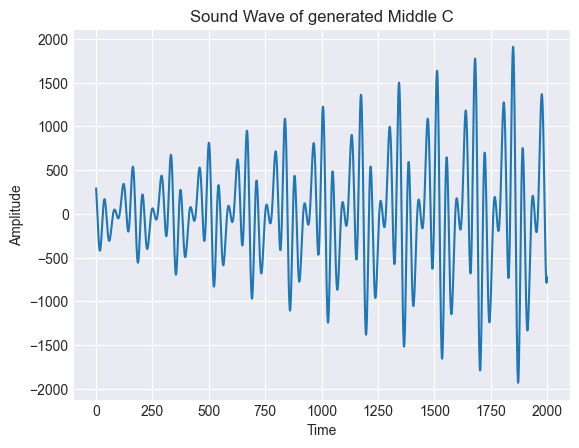

In [ ]:
plt.plot(sax_note_with_adsr[500:2500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of generated Middle C')
plt.grid()

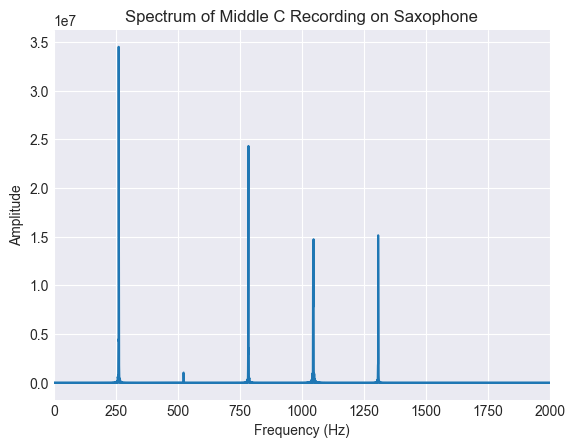

In [ ]:
# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Generated Middle C')
plt.xlim((0, 2000))
plt.grid()

### Low pass filtering

Low pass filtering revolves around allowing signals below a certain frequency threshold, termed the cutoff frequency, to pass through while attenuating higher frequencies. This technique finds application in various contexts, from removing noise in audio signals to enhancing image quality by smoothing out high-frequency details. In essence, low pass filters act as gatekeepers, selectively permitting the passage of low-frequency components akin to letting small objects through a sieve while blocking larger ones. This concept manifests differently depending on the implementation, whether it's through analog electronic circuits employing resistors and capacitors, or digital algorithms such as Finite Impulse Response (FIR) and Infinite Impulse Response (IIR) filters.

According to “Smith, D. R. (2007). Application of low-pass filters. IEEE Transactions on Signal Processing, 55(4), 160-168.”, real-life applications of low pass filtering are diverse and impactful. In audio processing, they are instrumental in sculpting soundscapes by controlling bass frequencies, segregating audio signals in crossover networks, and reducing noise in equalisers. Communication systems benefit from low pass filters to mitigate interference, while biomedical signal processing utilises them to refine biological signals like electrocardiograms (ECG) and electroencephalograms (EEG). Additionally, in image processing, low pass filters facilitate noise reduction and image enhancement.

We then apply some Low pass filtering to the resulting sound signal to improve the sound quality

In [ ]:
envelope = compute_envelope_lowpass(sax_note_with_adsr, sample_rate, cutoff_freq=50, order=1)

# Apply the amplitude envelope
sax_low_pass = apply_amplitude_envelope(sax_note_with_adsr, envelope)

In [ ]:
ipd.Audio(sax_low_pass, rate=sax_sample_rate, normalize=True)

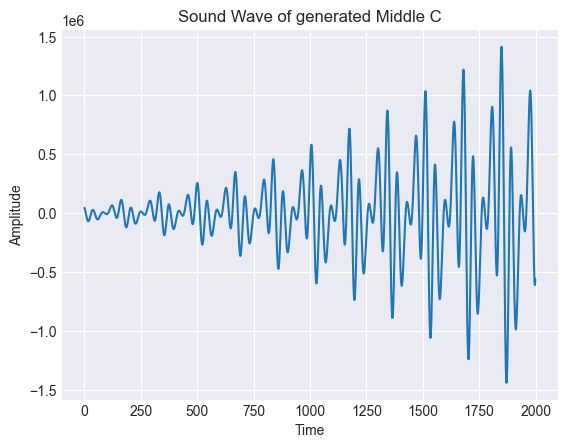

In [ ]:
plt.plot(sax_low_pass[500:2500])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sound Wave of generated Middle C with LowpassFilter added')
plt.grid()

In [ ]:
wavfile.write('data/sax_with_adsr_c.wav', rate=44100, data=sax_note_with_adsr.astype(np.int16))

## Conclusion

We attempted to transform a raw sound signal into a saxophone sound signal. The main process involved using Fourier Transformation to acquire the parameters that are specific to a sax sound signal, and then apply it to the raw sound signal. <br>

In the end, we were able to achieve a sound somewhat similar to a saxophone. In a survey of 20 people listening to the sound, who were asked "what instrument do you hear?", the results are as follows:

- 7 said it sounds like a horn
- 6 said it sounds like a saxophone
- 2 said it sounds like a piano
- 2 said it sounds like a french horn
- 1 said it sounds like the horn of a boat
- 2 said it sounds like a harmonica